# COVID CASE STUDY FOR BRAZIL (2020)

#### Team members: Araz Sharma, Harsh Vardhan Goyal, Sukriti Paul


### Define the Problem from a High Level View

#### Nature of the problem:
Covid-19 currently a problem of Global significance. A virus which started in the Wuhan has quickly spread across the globe and has tested the governments and
existing health care system of even the most developed countries. A once in a lifetime pandemic has exposed how international organisations likes off but not
limited to WHO, UN have sparse resources and experience to tackle a pandemic.

#### Types of solutions we can develop:
As the part of the Public Health Ministry for the country of Brazil, it is our responsibility to come up with a public policy that will minimise the affects of this
pandemic, the priority of the Ministry is to save as many lives as possible and to focus on preventive measure curtailing to limited financial resources the country
has.

#### Metrics to use to measure performance:
We want to maximise the number of lives saved by incorporating the policy of one of the three countries we can see the future of as compared to actual statistics
for the country if <a href="https://www.nytimes.com/2020/04/01/world/americas/brazil-bolsonaro-coronavirus.html">no actions</a> are to be taken.

#### Machine Learning - is it the right approach?

The scale of the problem is such that machine learning is probably the best approach to give us an estimate of what trend to expect given the following conditions-
1. <a href="https://in.reuters.com/article/us-health-coronavirus-belgium/belgium-revises-down-covid-19-deaths-just-shy-of-10000-mark-idINKBN25M1N0">Be like Belgium?</a>- Belgium is one of the few countries which has classified suspected Covid19 deaths in their death toll, political agenda should not bias the
information given out by the country.
2. <a href="https://timesofindia.indiatimes.com/india/only-22-deaths-in-india-medically-certified-below-10-in-some-states/articleshow/70968981.cms">Health and Medical infrastructure of developing countries</a>- Highly populated countries such as India with poor medical and healthcare system might give us a
biased report. Only 22% of deaths are medically reported in India under normal circumstances.

#### How Artificial Intelligence can help?
Artificial Intelligence company BlueDot which uses machine learning to monitor the outbreak of infectious diseases around the world alerted clients to an unusual
number of pneumonia cases in Wuhan. BlueDot is not the only company to pick up on this trend. The use of AI and machine learning with the help of transparent
and readily available data can help us limit the next pandemic to a great extent.

#### How Data can help fight a health crisis like the Covid-19?
1. <a href="https://www.weforum.org/agenda/2020/03/role-data-fight-coronavirus-epidemic/">Monitoring population movements using mobile phone data</a> - Arogyesetu app initiative and Dal berg Data Insights are examples of government initiatives of
countries India and Belgium respectively with the main goal to understand human mobility trends in regard to lockdown measures and evaluate risk of infection
increases in specific region.

2. <a href="https://www.weforum.org/agenda/2020/03/role-data-fight-coronavirus-epidemic/">Identifying communities at risk</a>- Especially relevant in emerging countries where living conditions can compromise one’s ability to follow advice on how to
behave. A combination of available primary data collection, data from national bureaus of statistics and satellite images can be combined to analyse high risk
profiles in various countries.


In [208]:
#IMPORTING REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LassoCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
#from prettytable import PrettyTable
import seaborn as sns

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

import seaborn as sns
sns.set()

## Consolidating Data

In [209]:
#READING DATASETS

brazil_c19 = pd.read_csv('data/Brazil/brazil_covid19.csv')
brazil_covid19_macro = pd.read_csv('data/Brazil/brazil_covid19_macro.csv')
brazil_cities_coordinates = pd.read_csv('data/Brazil/brazil_cities_coordinates.csv')
brazil_c19_old = pd.read_csv('data/Brazil/brazil_covid19_old.csv')
brazil_c19_cities = pd.read_csv('data/Brazil/brazil_covid19_cities.csv')

ts_c19_recovered = pd.read_csv('data/South Korea/time_series_covid_19_recovered.csv')
ts_c19_deaths    = pd.read_csv('data/South Korea/time_series_covid_19_deaths.csv')
ts_c19_confirmed= pd.read_csv('data/South Korea/time_series_covid_19_confirmed.csv')

In [210]:
display(ts_c19_recovered.head(2))
display(ts_c19_confirmed.head(2))
display(ts_c19_deaths.head(2))

#Challenge: Dates are expressed as Columns


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32073,32098,32503,32505,32576,32576,32576,32576,32576,32610
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6615,6668,6733,6788,6831,6888,6940,6995,7042,7139


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1425,1426,1436,1436,1437,1437,1441,1444,1445,1446
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,338,340,343,347,353,358,362,364,367,370


### Data Pre-Processing & Cleaning

1. Making Date Columns into Rows (using Melt)
2. Multi-Indexing (Country, Date)
3. Missing Value treatment - Done Later
4. Normalising by Population of Country - Done Later

In [211]:
#Cleaning data by melt 
def cleandata(df_raw):
    df_cleaned = df_raw.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], value_name = 'Cases', var_name = 'Date')
    df_cleaned = df_cleaned.set_index(['Country/Region', 'Province/State', 'Date'])
    return df_cleaned

#Applying for Time Series Datasets
ts_c19_confirmed_cleaned = cleandata(ts_c19_confirmed)
ts_c19_deaths_cleaned = cleandata(ts_c19_deaths)
ts_c19_recovered_cleaned = cleandata(ts_c19_recovered)
display(ts_c19_confirmed_cleaned.head(2), ts_c19_deaths_cleaned.head(2), ts_c19_recovered_cleaned.head(2))

,,,Lat,Long,Cases
Country/Region,Province/State,Date,,,
Afghanistan,NaN,1/22/20,33.93911,67.709953,0
Albania,NaN,1/22/20,41.15330,20.168300,0


,,,Lat,Long,Cases
Country/Region,Province/State,Date,,,
Afghanistan,NaN,1/22/20,33.93911,67.709953,0
Albania,NaN,1/22/20,41.15330,20.168300,0


,,,Lat,Long,Cases
Country/Region,Province/State,Date,,,
Afghanistan,NaN,1/22/20,33.93911,67.709953,0
Albania,NaN,1/22/20,41.15330,20.168300,0


In [212]:
#Perform multi indexing, where level-0 is Country and level-1 is date
def countrydata(df_cleaned,oldname,newname):
    df_country=df_cleaned.groupby(['Country/Region','Date'])['Cases'].sum().reset_index()
    df_country=df_country.set_index(['Country/Region','Date'])
    df_country.index=df_country.index.set_levels([df_country.index.levels[0], pd.to_datetime(df_country.index.levels[1])])
    df_country=df_country.sort_values(['Country/Region','Date'],ascending=True)
    df_country=df_country.rename(columns={oldname:newname})
    return df_country



### Feature Creation


**We have used the time series data for deaths, confirmed cases and recovered cases; these serve as our base data. We create simple derived predictors from the base, as explained below. 
Ultimately, we create the features at the date-level, for each of five countries.** 

1. Creating Total Cases, Total Deaths, Total Recoveries from Cases, Deaths and Recoveries respectively
2. Creating New Cases, New Deaths, New Recoveries from Total Cases, Total Deaths and Total Recoveries respectively
3. Creating Active Cases and Mortality Rate
4. Consolidating to one Dataframe

#### Note:
* Active Cases = Total Cases - (Total Deaths + Total Recoveries)
* Mortality Rate = New Deaths / New Cases (At Country-Date Level)
* 'Total' refers to Cumulative Cases and 'New' refers to Fresh (Daily) cases

In [213]:
# Performing on Cleaned Time Series Datasets
#Creating 'Total' Predictors
confirmed_cases_country = countrydata(ts_c19_confirmed_cleaned, 'Cases', 'Total Cases')
deaths_country = countrydata(ts_c19_deaths_cleaned, 'Cases', 'Total Deaths')
recovery_country = countrydata(ts_c19_recovered_cleaned, 'Cases', 'Total Recoveries')
display(confirmed_cases_country.head(2),deaths_country.head(2), recovery_country.head(2))

Total Cases
Country/Region Date                   
Afghanistan    2020-01-22            0
               2020-01-23            0

Total Deaths
Country/Region Date                    
Afghanistan    2020-01-22             0
               2020-01-23             0

Total Recoveries
Country/Region Date                        
Afghanistan    2020-01-22                 0
               2020-01-23                 0

In [214]:
 
def dailydata(df_country, oldname, newname):
    daily_count = df_country.groupby(level=0).diff().fillna(0)
    daily_count = df_country.rename(columns={oldname:newname})
    return daily_count
cases_daily = dailydata(confirmed_cases_country, 'Total Cases', 'New cases')
deaths_daily = dailydata(deaths_country, 'Total Deaths', 'New Deaths')
recoveries_daily = dailydata(recovery_country, 'Total Recoveries', 'New Recoveries')
display(cases_daily.head(2), deaths_daily.head(2), recoveries_daily.head(2))

New cases
Country/Region Date                 
Afghanistan    2020-01-22          0
               2020-01-23          0

New Deaths
Country/Region Date                  
Afghanistan    2020-01-22           0
               2020-01-23           0

New Recoveries
Country/Region Date                      
Afghanistan    2020-01-22               0
               2020-01-23               0

In [215]:
#Creating Active Cases and Mortality Rate
#Consilidate in one dataframe 
consolidated_df = pd.merge(confirmed_cases_country, cases_daily, how='left', left_index=True, right_index= True)
consolidated_df = pd.merge(consolidated_df, deaths_country, how='left', left_index=True, right_index= True)
consolidated_df = pd.merge(consolidated_df, deaths_daily, how='left', left_index=True, right_index= True)
consolidated_df = pd.merge(consolidated_df, recovery_country, how='left', left_index=True, right_index= True)
consolidated_df = pd.merge(consolidated_df, recoveries_daily, how='left', left_index=True, right_index= True)
consolidated_df['Active Cases']=consolidated_df['Total Cases']-consolidated_df['Total Deaths']-consolidated_df['Total Recoveries']
consolidated_df['mortality_rate']=np.round(consolidated_df['New Deaths']/consolidated_df['New cases'],3)


In [216]:
# Filling Predictor values for: 'New' 
# Logic: Subtract Pairs of Subsequent Total Death entries, arranged by Dates 

consolidated_df['New cases'] = consolidated_df['Total Cases'] - consolidated_df['Total Cases'].shift(1)
consolidated_df['New Deaths'] = consolidated_df['Total Deaths'] - consolidated_df['Total Deaths'].shift(1)
consolidated_df['New Recoveries'] = consolidated_df['Total Recoveries'] - consolidated_df['Total Recoveries'].shift(1)
#dtf["new"] = dtf["total"] - dtf["total"].shift(1)


#### Missing / NA Value Treatment 
We have chosen to drop such values since we're able to retain around 83% of Consolidated Data

In [217]:
#drop na values 
df = consolidated_df.dropna()
print("% of Entries dropped:",  round(((consolidated_df.shape[0] - df.shape[0])/consolidated_df.shape[0])*100,2))

% of Entries dropped: 17.37


In [218]:
df.head(5)

Total Cases  New cases  Total Deaths  New Deaths  \
Country/Region Date                                                           
Afghanistan    2020-02-24            1        1.0             0         0.0   
               2020-02-25            1        0.0             0         0.0   
               2020-02-26            1        0.0             0         0.0   
               2020-02-27            1        0.0             0         0.0   
               2020-02-28            1        0.0             0         0.0   

                           Total Recoveries  New Recoveries  Active Cases  \
Country/Region Date                                                         
Afghanistan    2020-02-24                 0             0.0             1   
               2020-02-25                 0             0.0             1   
               2020-02-26                 0             0.0             1   
               2020-02-27                 0             0.0             1   
               2020-02-28                 0             0.0             1   

                           mortality_rate  
Country/Region Date                        
Afghanistan    2020-02-24             0.0  
               2020-02-25             0.0  
               2020-02-26             0.0  
               2020-02-27             0.0  
               2020-02-28             0.0

### Data Visualisation

Visualising Consolidated Time Series Data for Brazil, Korea, India and Italy

The graphs comprise plots which help us compare predictor trends across four countries. The predictors that we've considered are Total Cases, New Cases, Total Deaths, New Deaths, Total Recoveries, New recoveries, and Mortality Rate.

<u>Reference 1</u>: New Deaths vs. Date Graph <br> 
     Inference: We can visually observe the impact of a **late lockdown on Italy**, due to which the new deaths (and cases) have spiked in the early months. On the contrary, **India's early lockdown** shows that the number of deaths (cases) have surged in the later months. In general, **Korea has a flattened graph**, which shows that **contact tracing** was successfully implemented.
     
<u>Reference 2</u>: New Cases vs. Date Graph <br>
Inference: India has a much higher count for the number of cases (deaths) in the later months. This inflation could be because of **India’s large population.**      
     
<u>Reference 3</u>: Mortality Rate vs. Date Graph <br>
Inference: Italy seems to have the worst of trends when it comes to Mortality Rates. The number of new deaths per new case could be high because of some other factors that affect deaths. For example, Italy has a smaller geographical area (than India), resulting in faster daily spread of cases, thereby resulting in more deaths. <i>We have done an additional analysis incorporating distance-based predictors in the additional section (end).<i/>



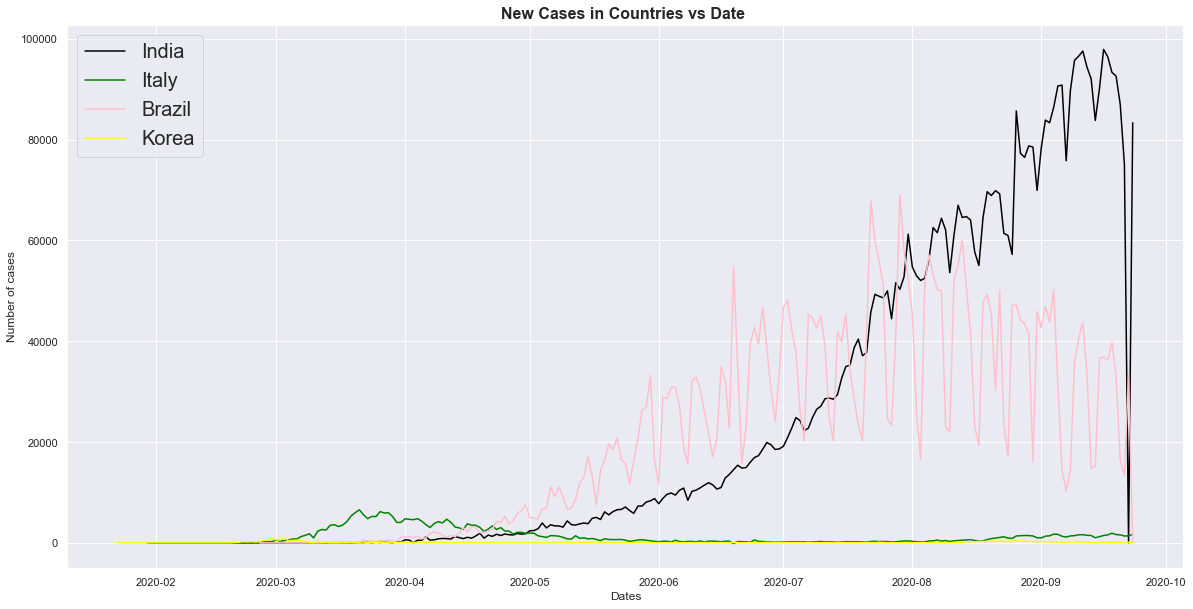

In [219]:
#plots 
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df.loc["India",:]['New cases'], label = 'India', color='black')
plt.plot(df.loc["Italy",:]['New cases'],  label = 'Italy', color='green')
plt.plot(df.loc["Brazil",:]['New cases'], label = 'Brazil', color='pink')
plt.plot(df.loc["Korea, South", :]['New cases'][1:], label = 'Korea', color='yellow')
plt.legend(fontsize=20)
plt.title("New Cases in Countries vs Date ", fontsize=16, fontweight='bold')
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.show()

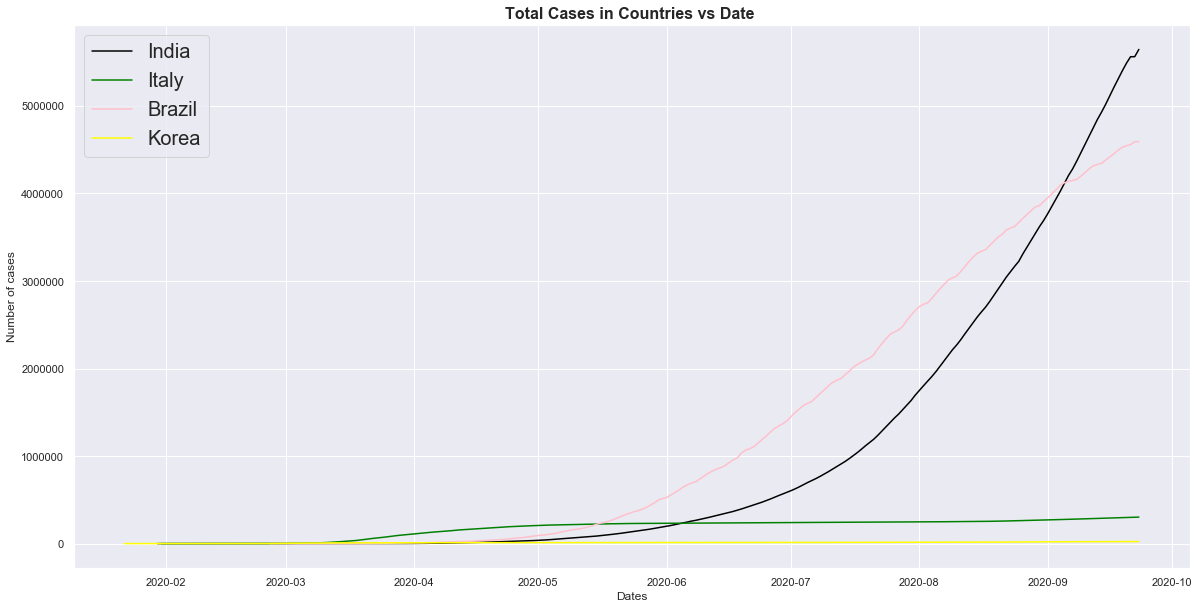

In [220]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df.loc["India",:]['Total Cases'], label = 'India', color='black')
plt.plot(df.loc["Italy",:]['Total Cases'],  label = 'Italy', color='green')
plt.plot(df.loc["Brazil",:]['Total Cases'], label = 'Brazil', color='pink')
plt.plot(df.loc["Korea, South", :]['Total Cases'], label = 'Korea', color='yellow')
plt.legend(fontsize=20)
plt.title("Total Cases in Countries vs Date ", fontsize=16, fontweight='bold')
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.show()

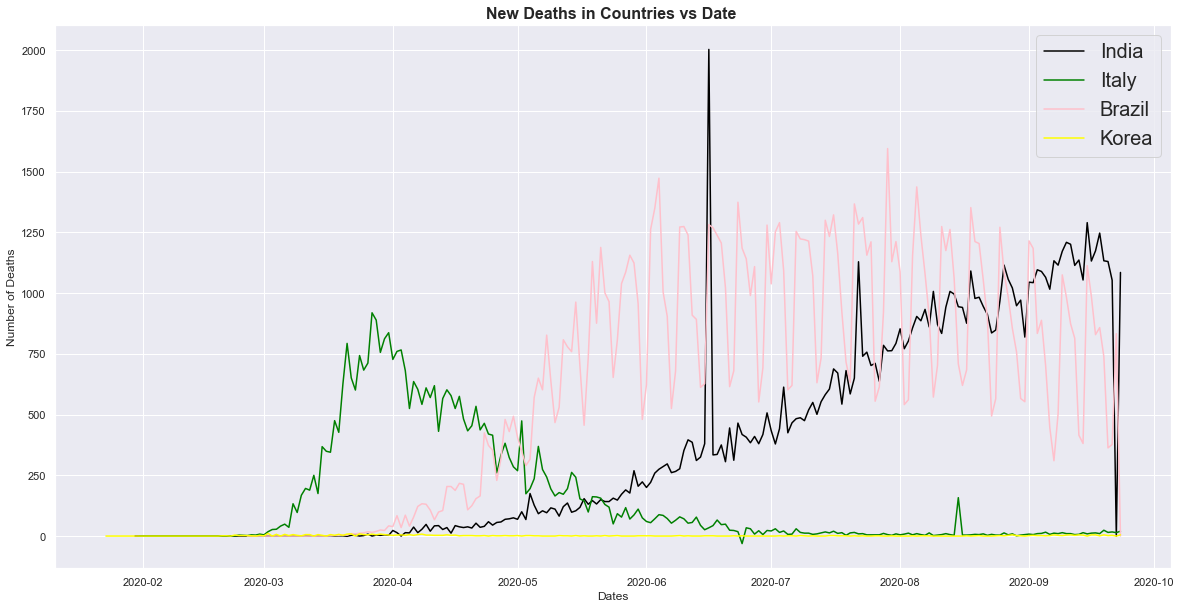

In [221]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df.loc["India",:]['New Deaths'], label = 'India', color='black')
plt.plot(df.loc["Italy",:]['New Deaths'],  label = 'Italy', color='green')
plt.plot(df.loc["Brazil",:]['New Deaths'], label = 'Brazil', color='pink')
plt.plot(df.loc["Korea, South", :]['New Deaths'][1:], label = 'Korea', color='yellow')
plt.legend(fontsize=20)
plt.title("New Deaths in Countries vs Date ", fontsize=16, fontweight='bold')
plt.xlabel("Dates")
plt.ylabel("Number of Deaths")
plt.show()

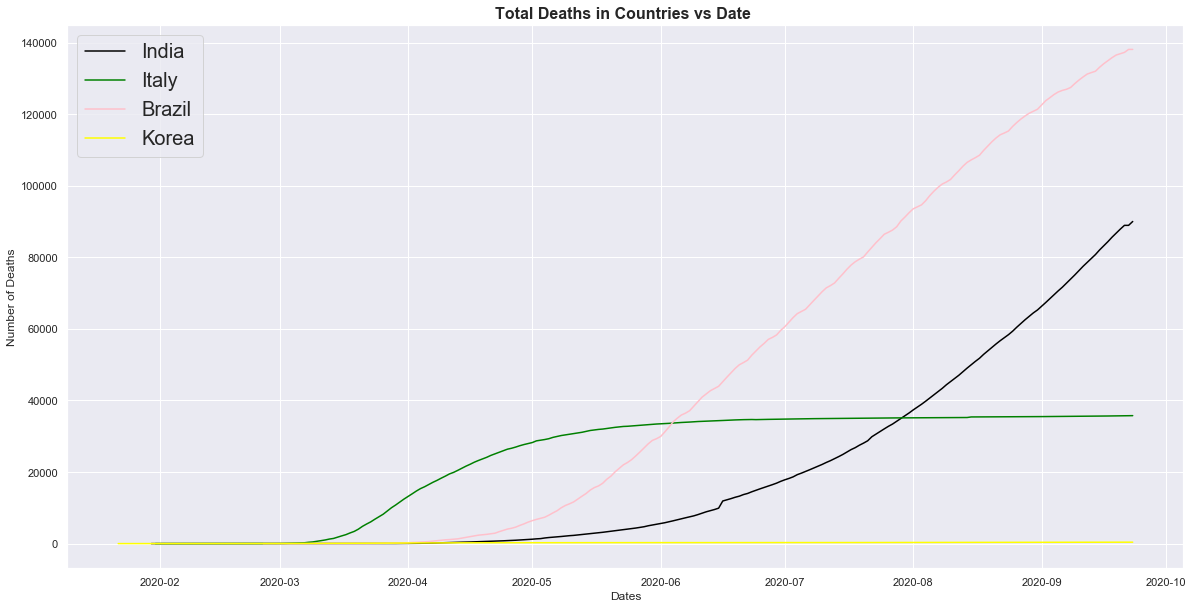

In [222]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df.loc["India",:]['Total Deaths'], label = 'India', color='black')
plt.plot(df.loc["Italy",:]['Total Deaths'],  label = 'Italy', color='green')
plt.plot(df.loc["Brazil",:]['Total Deaths'], label = 'Brazil', color='pink')
plt.plot(df.loc["Korea, South", :]['Total Deaths'], label = 'Korea', color='yellow')
plt.legend(fontsize=20)
plt.title("Total Deaths in Countries vs Date ", fontsize=16, fontweight='bold')
plt.xlabel("Dates")
plt.ylabel("Number of Deaths")
plt.show()

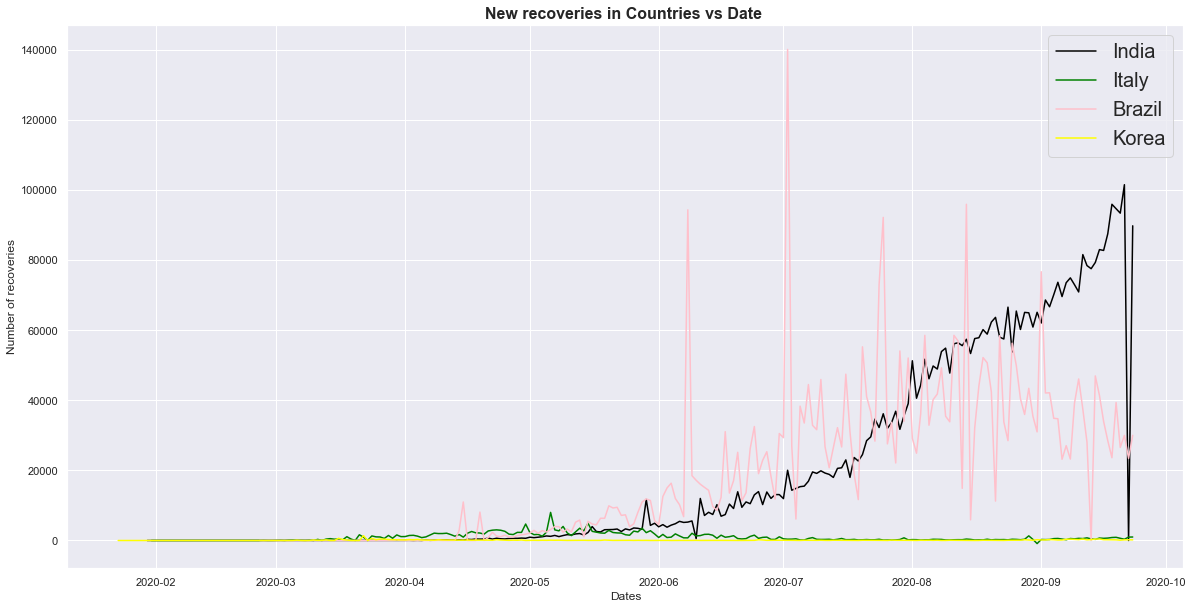

In [223]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df.loc["India",:]['New Recoveries'], label = 'India', color='black')
plt.plot(df.loc["Italy",:]['New Recoveries'],  label = 'Italy', color='green')
plt.plot(df.loc["Brazil",:]['New Recoveries'], label = 'Brazil', color='pink')
plt.plot(df.loc["Korea, South", :]['New Recoveries'][1:], label = 'Korea', color='yellow')
plt.legend(fontsize=20)
plt.title("New recoveries in Countries vs Date ", fontsize=16, fontweight='bold')
plt.xlabel("Dates")
plt.ylabel("Number of recoveries")
plt.show()

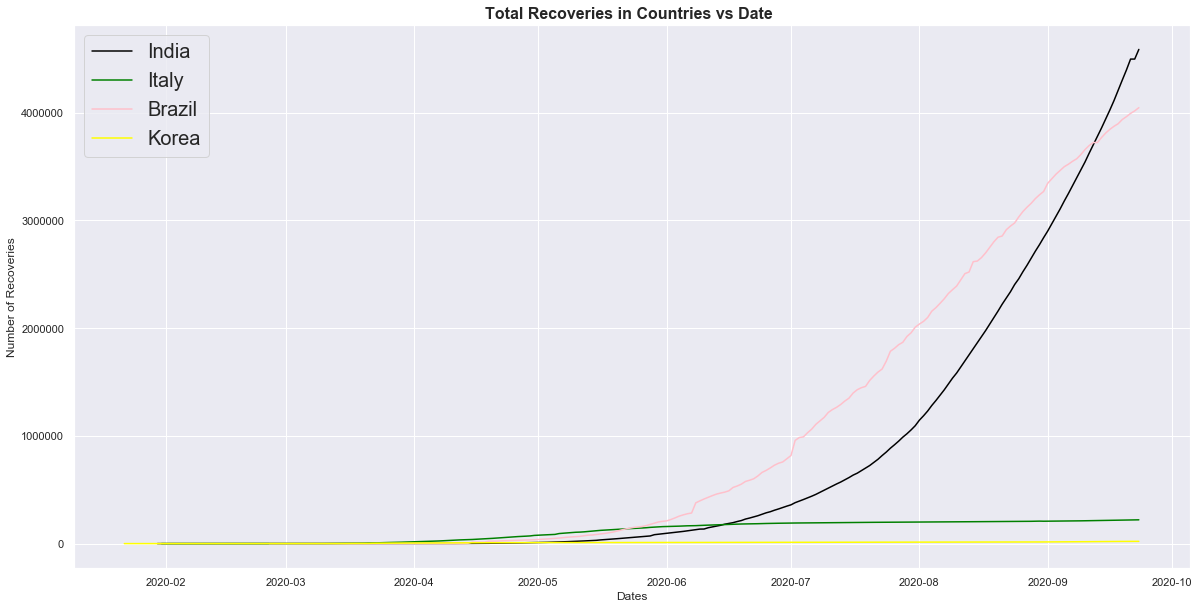

In [224]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df.loc["India",:]['Total Recoveries'], label = 'India', color='black')
plt.plot(df.loc["Italy",:]['Total Recoveries'],  label = 'Italy', color='green')
plt.plot(df.loc["Brazil",:]['Total Recoveries'], label = 'Brazil', color='pink')
plt.plot(df.loc["Korea, South", :]['Total Recoveries'], label = 'Korea', color='yellow')
plt.legend(fontsize=20)
plt.title("Total Recoveries in Countries vs Date ", fontsize=16, fontweight='bold')
plt.xlabel("Dates")
plt.ylabel("Number of Recoveries")
plt.show()

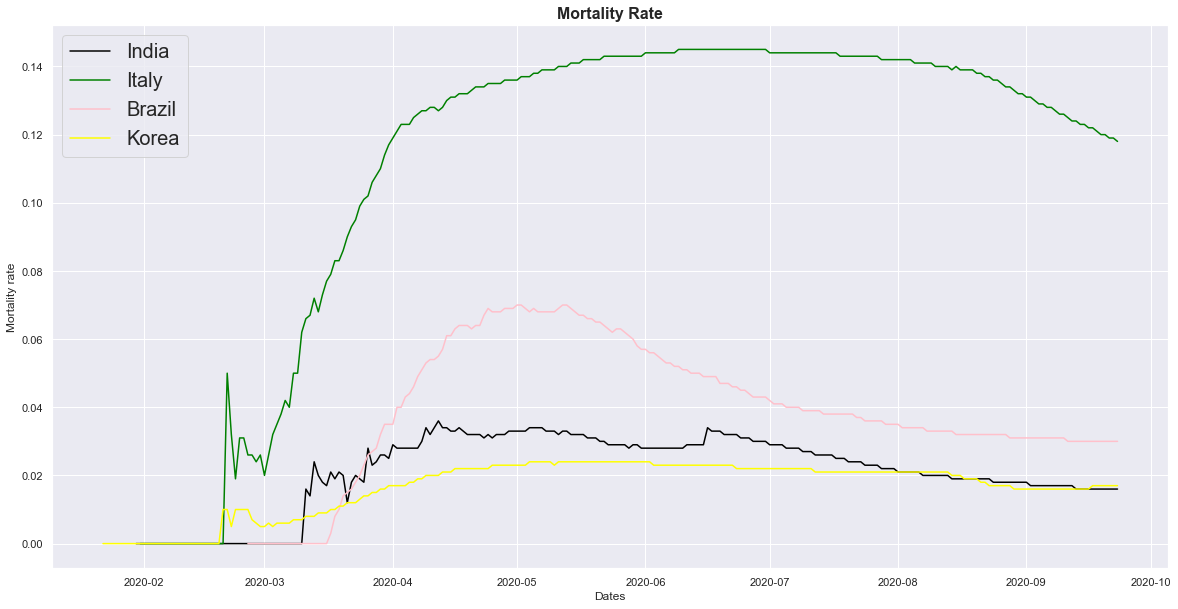

In [225]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df.loc["India",:]['mortality_rate'], label = 'India', color='black')
plt.plot(df.loc["Italy",:]['mortality_rate'],  label = 'Italy', color='green')
plt.plot(df.loc["Brazil",:]['mortality_rate'], label = 'Brazil', color='pink')
plt.plot(df.loc["Korea, South", :]['mortality_rate'], label = 'Korea', color='yellow')
plt.legend(fontsize=20)
plt.title("Mortality Rate", fontsize=16, fontweight='bold')
plt.xlabel("Dates")
plt.ylabel("Mortality rate")
plt.show()

## Creating Country-Wise Datasets
Datasets Created: df_India, df_Korea, df_Italy, df_Brazil. These Datasets are fed into the Models at a later stage

For each country, we find the **population per 10 million** (pop_ind, pop_brz, pop_itly, pop_korea). <i>The motive for this step is to prevent the country population from influencing our inference for a particular policy.</i> For example, a country with a large population may have greater number of cases when compared to the low populated countries, irrespective of whether an effective policy is in place or not. We aim to create a more 'fair' way of assessing the policies.


**Assumption 1**: We are taking the Population for each country as of 1st Jan 2020, and we assume this to be constant for the entire timeframe.

Population Source: <a href="https://countrymeters.info/">https://countrymeters.info/</a>




In [226]:
# Creating Country Dataframes
df_india = df.loc["India", :]
df_korea = df.loc["Korea, South", :]
df_brazil = df.loc["Brazil", :]
df_italy = df.loc["Italy", :]

In [227]:
Mil_Cases= df_india['Total Cases'].values
df_india['TotCas_perMil'] = Mil_Cases

BMil_Cases= df_brazil['Total Cases'].values
df_brazil['TotCas_perMil'] = BMil_Cases

BMil_Cases= df_italy['Total Cases'].values
df_italy['TotCas_perMil'] = BMil_Cases

BMil_Cases= df_korea['Total Cases'].values
df_korea['TotCas_perMil'] = BMil_Cases

In [228]:
pop_ind = 1387297452/10000000
pop_brz = 216552469/10000000
pop_itly = 60005743/10000000
pop_korea = 51410184/10000000


In [229]:
df_india = df_india/pop_ind
df_brazil = df_brazil/pop_brz
df_italy = df_italy/pop_itly
df_korea = df_korea/pop_korea
df_korea = df_korea.iloc[1:]


## Multi-Collinearity Check
 1. Check Pairwise Correlations (To get a general Idea of Highly Correlated Predictors)
 2. Multi-Collinearity check via : Variance Inflation Factor
 3. Drop predictors based on high VIF values



### CASE A: Features Dropped before VIF (Based on Intuiton)

After creating the predictors, we dropped five predictors since they appeared to be highly correlated with our response variable ‘New Deaths’. ‘Total Deaths’ is direct source of the response variable. Similarly, 'Total Cases', 'Total Recoveries' are strongly and positively correlated to the response. We initially assumed that mortality_rate would have a direct relation with the number of daily deaths . In retrospect, the population also plays a role in estimating the mortality rate.

<u>Features Dropped</u>: Total Deaths, Total Cases, Total Recoveries, mortality_rate
 

In [230]:
#corr matrix
df_india.corr()

,Total Cases,New cases,Total Deaths,New Deaths,Total Recoveries,New Recoveries,Active Cases,mortality_rate,TotCas_perMil
Total Cases,1.000000,0.937848,0.991075,0.853480,0.998166,0.957452,0.976364,-0.100213,1.000000
New cases,0.937848,1.000000,0.962231,0.937566,0.919514,0.983195,0.975126,-0.035878,0.937848
Total Deaths,0.991075,0.962231,1.000000,0.898574,0.981651,0.969179,0.994640,-0.057172,0.991075
New Deaths,0.853480,0.937566,0.898574,1.000000,0.827768,0.914904,0.919286,0.074770,0.853480
Total Recoveries,0.998166,0.919514,0.981651,0.827768,1.000000,0.945194,0.961490,-0.117626,0.998166
New Recoveries,0.957452,0.983195,0.969179,0.914904,0.945194,1.000000,0.972432,-0.071858,0.957452
Active Cases,0.976364,0.975126,0.994640,0.919286,0.961490,0.972432,1.000000,-0.035489,0.976364
mortality_rate,-0.100213,-0.035878,-0.057172,0.074770,-0.117626,-0.071858,-0.035489,1.000000,-0.100213
TotCas_perMil,1.000000,0.937848,0.991075,0.853480,0.998166,0.957452,0.976364,-0.100213,1.000000


### CASE B: Revised Feature Dropped after VIF

The VIF Score trends across the five countries, are similar. We observed values as high as infinity (perfect correlation) for five predictors, namely,  Total Deaths, Active Cases, Total Cases,Total Recoveries, TotCas_perMil. Therefore, most of these have been eliminated in our revised predictor list. We have presented the VIF scores of predictors, post elimination, below. 

**<u>Features Dropped</u>: Total Deaths, Active Cases, Total Cases, Total Recoveries**

In [231]:
#VIF Function for getting the VIF scores for the predictors 
#Note: We have performed VIF on all the 4 countries, 
#however we present the scores for Brazil (Since the correlation trends are similar accross all Countries)
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def collinearity_VIF(df):
    df_vif=pd.DataFrame()
    df_vif["predictors"] = df.columns
    df_vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    df_vif=df_vif.sort_values(by=['VIF'])
    return df_vif
    
df_brazil_vif= collinearity_VIF(df_brazil)  # Verified for other Countries as well
display(df_brazil_vif)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,predictors,VIF
7,mortality_rate,3.856563
5,New Recoveries,4.653481
1,New cases,30.449527
3,New Deaths,35.366849
0,Total Cases,inf
2,Total Deaths,inf
4,Total Recoveries,inf
6,Active Cases,inf
8,TotCas_perMil,inf



* Ideally, we should be dropping predictors, which have the highest VIF (inf in this case). We've **dropped 3/5 predictors**, which have infinite VIF (infinite values imply that these predictors are almost perfectly correlated, causing the r-squared value to tend to one).
* For next step, we're re-performing VIF after dropping the features that we chose i.e., ['Total Deaths', 'New Deaths', 'Total Cases', 'Total Recoveries', 'mortality_rate'].

### VIF on the Brazil Data with the Predictors Dropped (CASE A)

In [232]:
df_brazil_dropped=df_brazil.drop(columns = ['Total Deaths', 'New Deaths', 'Total Cases', 'Total Recoveries', 'mortality_rate'])
df_brazil_vif= collinearity_VIF(df_brazil_dropped)
df_brazil_vif 

,predictors,VIF
1,New Recoveries,4.587312
3,TotCas_perMil,6.135191
0,New cases,10.872613
2,Active Cases,16.593632


### VIF on the Brazil Data with the Predictors Dropped (CASE B)


In [233]:
df_brazil_dropped=df_brazil.drop(columns = ['Total Deaths', 'Active Cases', 'Total Cases', 'Total Recoveries', 'New Deaths'])
df_brazil_vif= collinearity_VIF(df_brazil_dropped)
df_brazil_vif

,predictors,VIF
2,mortality_rate,1.912022
3,TotCas_perMil,3.814675
1,New Recoveries,4.584705
0,New cases,6.168968


#### Inference:
Overall, we observed that the set of predictors dropped in Case B are a better choice than the predictors dropped in Case A
We can infer this by comparing the VIF values after dropping predictors in both case. **For the remaining analysis, we use the final predictors from Case B**

## Modelling

**Assumption 2**: We assume an ideal scenario where external factors, which are not provided in the datasets, do not influence our model performance. For example, administration, country geography, economy, health-care facilities, the general mindset of the citizens etc. may influence the policy-making in a real-world scenario. They may even impact the simple predictors that we have considered. As of now, we have limited our exploration to areas like population data, distance etc.

**Assumption 3**: **In a nutshell, we individually train three learning models on three countries (S.Korea, India and Italy ), and predict on the Brazil dataset.** This requires us to assume that certain 'external' factors for Brazil and for the other countries are similar, to make any policy comparisons. If we begin delving into the nitty-gritties of how these countries differ, then policy-making would become challenging with the given data.

In the future, with more data, we may be able to analyze how these countries are similar to Brazil, to make a more sound case.



### Modelling Approach

Model Choice: **Multi-Linear Regression** is used for subsequent analysis

Predictors: As mentioned in Previous Section (CASE B) - **mortality_rate, TotCas_perMil, New Recoveries, New cases**

Response: **Total Deaths**

1. **Total Deaths** for all countries have been taken as response variable as the the ministry thinks that the primary concern should be to minimise the number of deaths caused by the virus.
<br>
2. We have used country specific data of ITALY, INDIA and SOUTH KOREA to train the model thus implying that that the trend in each of these countries are a result of the public health policies of these countries.
<br>
3. We have tested the trained models on dataset of Brazil thus predicting the deaths in the country if policies of said country are applied. (Taking Assumptions 2 and 3 into consideration)
<br>
4. We do the above steps for 2 cases: **Without Bootsrapping and With Bootstrapping.** We compare results with both in the end.




**Why is there a non-bootstrap training case under model training ?** <br>
Since we are dealing with time-series data, we wish to conduct one series of experiments on the entire continous time frame spanning Feb-October'20. Therefore, we haven't performed any bootstrap for CASE I. By bootstrapping the data, some of the dates will be dropped at random - we wish to present this as a seperate case ( CASE II). 


### NON-BOOTSTRAPPED (CASE I)

#### BRAZIL MODELLED ON INDIA

In [234]:


X_train_ind = df_india.drop(columns = ['Total Deaths', 'Active Cases', 'Total Cases', 'Total Recoveries', 'New Deaths'])
X_test = df_brazil.drop(columns = ['Total Deaths', 'Active Cases', 'Total Cases', 'Total Recoveries', 'New Deaths'])
y_train_ind = df_india['Total Deaths']
y_test = df_brazil['Total Deaths']

In [235]:
LinReg = LinearRegression()
LinReg.fit(X_train_ind, y_train_ind)
ind_pred_test = LinReg.predict(X_test)
ind_pred_train = LinReg.predict(X_train_ind)

mse_test = mean_squared_error(y_test, ind_pred_test)
#print("Test MSE is:", mse_test)
mse_train = mean_squared_error(y_train_ind, ind_pred_train)
#print('TRAIN MSE is:', mse_train)

r2_test = r2_score(y_test, ind_pred_test)
#print("R2 score for Test:",r2_test)

Text(0.5, 1.0, 'Brazil modelled with India')

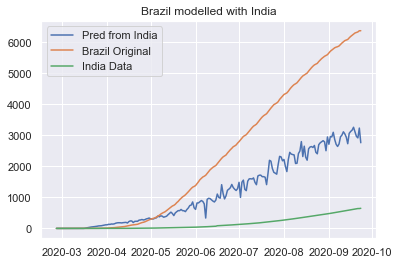

In [236]:
plt.plot(X_test.index, ind_pred_test, label = 'Pred from India')
plt.plot(X_test.index, y_test, label = 'Brazil Original')
plt.plot(X_train_ind[27:].index, y_train_ind[27:], label = 'India Data')
plt.legend()
plt.title('Brazil modelled with India')


#### BRAZIL MODELLED ON ITALY

#### For Italy, we have Dropped Predictors based on VIF 

In [237]:

X_train_itl = df_italy.drop(columns = ['Total Deaths', 'Active Cases', 'Total Cases', 'Total Recoveries', 'New Deaths'])

y_train_itl = df_italy['Total Deaths']


In [238]:
LinReg = LinearRegression()
LinReg.fit(X_train_itl, y_train_itl)
itl_pred_test = LinReg.predict(X_test)
itl_pred_train = LinReg.predict(X_train_itl)

mse_test = mean_squared_error(y_test, itl_pred_test)
#print("Test MSE is:", mse_test)
mse_train = mean_squared_error(y_train_itl, itl_pred_train)
#print('TRAIN MSE is:', mse_train)

r2_test = r2_score(y_test, itl_pred_test)
#print("R2 score for Test:",r2_test)

Text(0.5, 1.0, 'Brazil modelled with Italy')

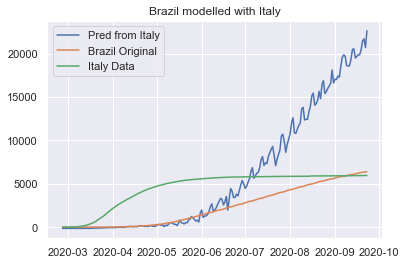

In [239]:
plt.plot(X_test.index, itl_pred_test, label = 'Pred from Italy')
plt.plot(X_test.index, y_test, label = 'Brazil Original')
plt.plot(X_train_itl[26:].index, y_train_itl[26:], label = 'Italy Data')
plt.legend()
plt.title('Brazil modelled with Italy')


#### BRAZIL MODELLED ON KOREA

#### For South Korea, we have Dropped Predictors based on VIF 

In [240]:
X_train_kor = df_korea.drop(columns = ['Total Deaths', 'Active Cases', 'Total Cases', 'Total Recoveries', 'New Deaths'])

y_train_kor = df_korea['Total Deaths']


In [241]:
LinReg = LinearRegression()
LinReg.fit(X_train_kor, y_train_kor)
kor_pred_test = LinReg.predict(X_test)
kor_pred_train = LinReg.predict(X_train_kor)

mse_test = mean_squared_error(y_test, kor_pred_test)
#print("Test MSE is:", mse_test)
mse_train = mean_squared_error(y_train_kor, kor_pred_train)
#print('TRAIN MSE is:', mse_train)

r2_test = r2_score(y_test, kor_pred_test)
#print("R2 score for Test:",r2_test)
#LinReg.coef_

Text(0.5, 1.0, 'Brazil modelled with Korea')

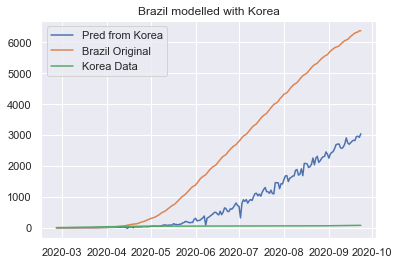

In [242]:
plt.plot(X_test.index, kor_pred_test, label = 'Pred from Korea')
plt.plot(X_test.index, y_test, label = 'Brazil Original')
plt.plot(X_train_kor[34:].index, y_train_kor[34:], label = 'Korea Data')
plt.legend()
plt.title('Brazil modelled with Korea')


#### Consolidated Visualisations (CASE I)
1. The above below visualisations tell us how will Brazil perform (in terms of predicted deaths), when the model is trained on another country from : India, Italy and Korea (individually)

2. The below plots have the Brazil Predictions from other countries, displayed on one plot

Text(0.5, 1.0, 'Brazil vs Modelling on India, Italy and Korea (Combined)')

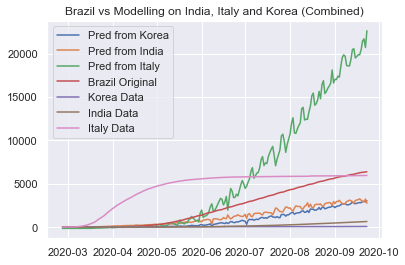

In [243]:
plt.plot(X_test.index, kor_pred_test, label = 'Pred from Korea')
plt.plot(X_test.index, ind_pred_test, label = 'Pred from India')
plt.plot(X_test.index, itl_pred_test, label = 'Pred from Italy')
plt.plot(X_test.index, y_test, label = 'Brazil Original')
plt.plot(X_train_kor[34:].index, y_train_kor[34:], label = 'Korea Data')
plt.plot(X_train_ind[27:].index, y_train_ind[27:], label = 'India Data')
plt.plot(X_train_itl[26:].index, y_train_itl[26:], label = 'Italy Data')
plt.legend()
plt.title('Brazil vs Modelling on India, Italy and Korea (Combined)')

Text(0.5, 1.0, 'Brazil vs Modelling on India and Korea (Combined)')

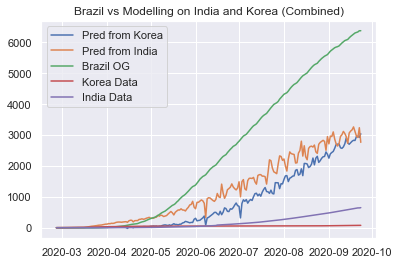

In [244]:
plt.plot(X_test.index, kor_pred_test, label = 'Pred from Korea')
plt.plot(X_test.index, ind_pred_test, label = 'Pred from India')
#plt.plot(X_test.index, itl_pred_test, label = 'Pred from Italy')
plt.plot(X_test.index, y_test, label = 'Brazil OG')
plt.plot(X_train_kor[34:].index, y_train_kor[34:], label = 'Korea Data')
plt.plot(X_train_ind[27:].index, y_train_ind[27:], label = 'India Data')
#plt.plot(X_train_itl[26:].index, y_train_itl[26:], label = 'Italy Data')
plt.legend()
plt.title('Brazil vs Modelling on India and Korea (Combined)')

### PERFOMANCE METRIC CREATED BY US TO EVALUATE WHICH COUNTRY POLICY IS BETTER
Aim: To save as many lives as possible by implementing policy of Country 'X' on Brazil (Taking assumptions 2 & 3 in consideration)

The **test MSE and R-squared value cannot be considered as a performance metric** across the countries. In certain cases, we would not want Brazil to fit on a poorly performing country. Conversely, if the country has an effective policy in place, we would want Brazil to fit the model trained on that country. This inspired us to design a common performance metric that helps us in understanding which country policy we should adopt.


We came up with a metric, which is both **practical and helpful.** To justify how well a model is performing, we want to give a **monthly update** rather than one number.

**Number of Lives Saved in Month = (Actual Deaths in that Month) - (Predicted Deaths in that Month)**

Given Total Deaths as Response Variable,for Months A,B,C... we get Actual Deaths in that Month by: <br>
**Actual Deaths in Month C = Total Deaths in Month C - Total Deaths in Month B**

This is implemented in the **avg_lives_saved** function, compatible with any Country Model and Brazil<br>
**dates**: Time Range to check performance<br>
**org_cnt**: Original Country (In our Case: Original Brazil Data)<br>
**pred_cnt**: Predicted for Country ( Modelled on Country 'X')

In [556]:

def avg_lives_saved(dates, org_cnt, pred_cnt):
    pred_cnt = pd.Series(pred_cnt, index = X_test.index )
    Dates_End = pd.date_range(dates.index[0],dates.index[-1], 
              freq='M').tolist()
    Dates_End.insert(0, dates.index[0])
    Dates_End.append(dates.index[-1])
    
    
    z = list(zip(Dates_End[:-1],Dates_End[1:]))
    Actual_Deaths = []
    for i,j in z:
        sum = 0
        dt = i
        while 1:
            sum+= org_cnt[dt]
            if(dt == j):
                break
            dt += datetime.timedelta(days=1)
        sum = sum/((j - i).days + 1)
        Actual_Deaths.append(sum)
            
         
    
    Pred_Deaths = []
    
    for i,j in z:
        sum = 0
        dt = i
        while 1:
            sum+= pred_cnt[dt]
            if(dt == j):
                break
            dt += datetime.timedelta(days=1)
        sum = sum/((j - i).days + 1)
        Pred_Deaths.append(sum)
        
        
    temp1 = Pred_Deaths[:]
    temp1.insert(0,0)
    
    pr = zip(temp1[:-1],Pred_Deaths)
    
    Pred_Deaths = [j - i for i,j in pr]
    
    
    
    temp2 = Actual_Deaths[:]
    temp2.insert(0,0)
    
    ac = zip(temp2[:-1],Actual_Deaths)
    
    Actual_Deaths = [j - i for i,j in ac]
    
    
    return Actual_Deaths, Pred_Deaths
    
    
    
   

#### Performance when Modelled on India (Non-Bootstrapped Case)

In [557]:
Actual_D, Pred_D = avg_lives_saved(X_test, y_test, ind_pred_test)

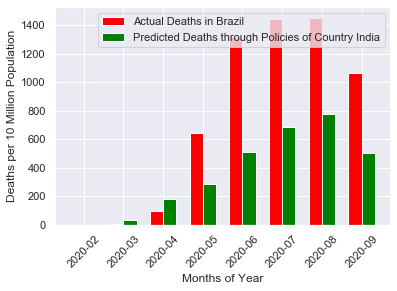

In [558]:
cnt = 'India'
Months = pd.date_range(X_test.index[0],X_test.index[-1],freq='MS').strftime("%Y-%m").tolist()
Months.insert(0,(X_test.index[0].strftime("%Y-%m")))
#print(Months)
indices = range(len(Actual_D))
width = np.min(np.diff(indices))/3

plt.bar(indices - width/2., Actual_D, width, color = 'red', label = 'Actual Deaths in Brazil')
plt.bar(indices + width/2., Pred_D, width, color = 'green', label = f'Predicted Deaths through Policies of Country {cnt}')
plt.xlabel('Months of Year')
plt.ylabel('Deaths per 10 Million Population')

plt.xticks(indices, Months, rotation = 45)
plt.legend()

Text(0.5, 1.0, 'Monthwise Lives Predicted from India')

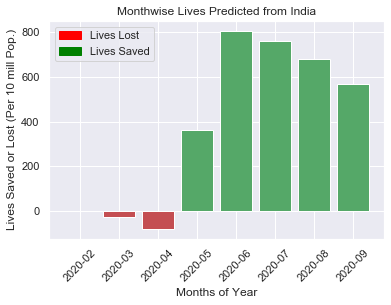

In [559]:
sub = zip(Actual_D, Pred_D)
Lives_Saved = [i - j for i, j in sub]
#lmap = filter(lambda x: x>0, Lives_Saved)
lmap = map(lambda x: x>0, Lives_Saved)
lmap = list(lmap)
lmap = map(lambda x: 'g' if x>0 else 'r', lmap)
lmap = list(lmap)
#print(lmap)
plt.bar(Months, Lives_Saved,color = lmap)
plt.xlabel('Months of Year')
plt.ylabel('Lives Saved or Lost (Per 10 mill Pop.)')
plt.xticks(rotation = 45)

colors = {'Lives Lost':'red', 'Lives Saved':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title(f'Monthwise Lives Predicted from {cnt}')


#### Performance when Modelled on Italy (Non-Bootstrapped Case)

In [560]:
cnt = 'Italy'
Actual_D, Pred_D = avg_lives_saved(X_test, y_test, itl_pred_test)

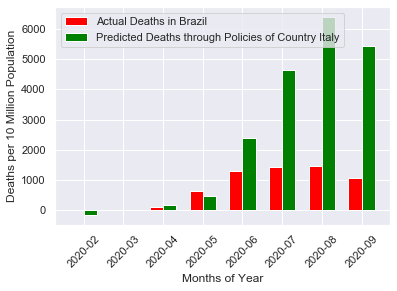

In [561]:
Months = pd.date_range(X_test.index[0],X_test.index[-1],freq='MS').strftime("%Y-%m").tolist()
Months.insert(0,(X_test.index[0].strftime("%Y-%m")))
indices = range(len(Actual_D))
width = np.min(np.diff(indices))/3
#print(Months)
plt.bar(indices - width/2., Actual_D, width,  color = 'red', label = 'Actual Deaths in Brazil')
plt.bar(indices + width/2., Pred_D, width, color = 'green', label = f'Predicted Deaths through Policies of Country {cnt}')
plt.xlabel('Months of Year')
plt.ylabel('Deaths per 10 Million Population')
plt.xticks(indices, Months, rotation = 45)
plt.legend()

Text(0.5, 1.0, 'Monthwise Lives Predicted from Italy')

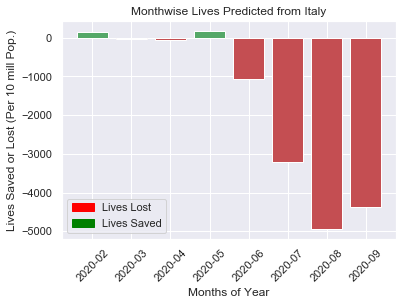

In [562]:
sub = zip(Actual_D, Pred_D)
Lives_Saved = [i - j for i, j in sub]
#lmap = filter(lambda x: x>0, Lives_Saved)
lmap = map(lambda x: x>0, Lives_Saved)
lmap = list(lmap)
lmap = map(lambda x: 'g' if x>0 else 'r', lmap)
lmap = list(lmap)
#print(lmap)
plt.bar(Months, Lives_Saved,color = lmap)
plt.xlabel('Months of Year')
plt.ylabel('Lives Saved or Lost (Per 10 mill Pop.)')
plt.xticks(rotation = 45)

colors = {'Lives Lost':'red', 'Lives Saved':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title(f'Monthwise Lives Predicted from {cnt}')

#### Performance when Modelled on Korea (Non-Bootstrapped Case)

In [563]:
cnt = 'Korea'
Actual_D, Pred_D = avg_lives_saved(X_test, y_test, kor_pred_test)

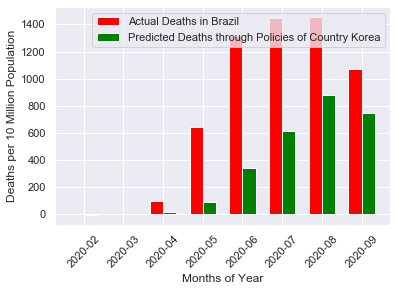

In [564]:
Months = pd.date_range(X_test.index[0],X_test.index[-1],freq='MS').strftime("%Y-%m").tolist()
Months.insert(0,(X_test.index[0].strftime("%Y-%m")))
indices = range(len(Actual_D))
width = np.min(np.diff(indices))/3
#print(Months)
plt.bar(indices - width/2., Actual_D, width,  color = 'red', label = 'Actual Deaths in Brazil')
plt.bar(indices + width/2., Pred_D, width, color = 'green', label = f'Predicted Deaths through Policies of Country {cnt}')
plt.xlabel('Months of Year')
plt.ylabel('Deaths per 10 Million Population')
plt.xticks(indices, Months, rotation = 45)
plt.legend()

Text(0.5, 1.0, 'Monthwise Lives Predicted from Korea')

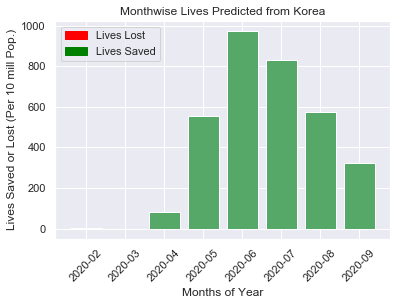

In [565]:
sub = zip(Actual_D, Pred_D)
Lives_Saved = [i - j for i, j in sub]
#lmap = filter(lambda x: x>0, Lives_Saved)
lmap = map(lambda x: x>0, Lives_Saved)
lmap = list(lmap)
lmap = map(lambda x: 'g' if x>0 else 'r', lmap)
lmap = list(lmap)
#print(lmap)
plt.bar(Months, Lives_Saved,color = lmap)
plt.xlabel('Months of Year')
plt.ylabel('Lives Saved or Lost (Per 10 mill Pop.)')
plt.xticks(rotation = 45)

colors = {'Lives Lost':'red', 'Lives Saved':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title(f'Monthwise Lives Predicted from {cnt}')

### BOOTSTRAPPED (CASE II)
Number of Bootstraps = 10

In [566]:
num_boots = 10
Boots = {'India':[], 'Italy':[], 'Korea': []}
Actual = {'India':0, 'Italy':0, 'Korea':0}
for i in range(num_boots):
    new_df_india = df_india.sample(frac = 1, replace = True)
    #print(new_df_india)
    new_df_italy  = df_italy.sample(frac = 1, replace= True)
    new_df_korea = df_korea.sample(frac = 1, replace = True)
    
    #INDIA
    
    X_train_ind = new_df_india.drop(columns = ['Total Deaths', 'Active Cases', 'Total Cases', 'Total Recoveries', 'New Deaths'])
    X_test = df_brazil.drop(columns = ['Total Deaths', 'Active Cases', 'Total Cases', 'Total Recoveries', 'New Deaths'])
    y_train_ind = new_df_india['Total Deaths']
    y_test = df_brazil['Total Deaths']
    
    LinReg = LinearRegression()
    LinReg.fit(X_train_ind, y_train_ind)
    ind_pred_test = LinReg.predict(X_test)
    ind_pred_train = LinReg.predict(X_train_ind)

    mse_test = mean_squared_error(y_test, ind_pred_test)
    #print("Test MSE is:", mse_test)
    mse_train = mean_squared_error(y_train_ind, ind_pred_train)
    #print('TRAIN MSE is:', mse_train)

    r2_test = r2_score(y_test, ind_pred_test)
    #print("R2 score for Test:",r2_test)
    
    #print("India Pred:",(ind_pred_test))
    
    plt.plot(X_test.index, ind_pred_test, label = 'Predicted from India')
    plt.plot(X_test.index, y_test, label = 'Brazil Original Data')
    plt.scatter(X_train_ind.index, y_train_ind, label = 'India Original Data')
    plt.legend()
    #plt.savefig(f"Boot_{i}_IndBrz.png")
    plt.clf()

    Actual_D, Pred_D = avg_lives_saved(X_test, y_test, ind_pred_test)
    Actual['India'] = Actual_D
    Boots['India'].append(Pred_D)
    
    #ITALY
    
    
    X_train_itl = new_df_italy.drop(columns = ['Total Deaths', 'Active Cases', 'Total Cases', 'Total Recoveries', 'New Deaths'])

    y_train_itl = new_df_italy['Total Deaths']
    
    LinReg = LinearRegression()
    LinReg.fit(X_train_itl, y_train_itl)
    itl_pred_test = LinReg.predict(X_test)
    itl_pred_train = LinReg.predict(X_train_itl)

    mse_test = mean_squared_error(y_test, itl_pred_test)
    #print("Test MSE is:", mse_test)
    mse_train = mean_squared_error(y_train_itl, itl_pred_train)
    #print('TRAIN MSE is:', mse_train)

    r2_test = r2_score(y_test, itl_pred_test)
    #print("R2 score for Test:",r2_test)
    
    
    
    plt.plot(X_test.index, itl_pred_test, label = 'Predictions from Italy')
    plt.plot(X_test.index, y_test, label = 'Brazil Original')
    plt.scatter(X_train_itl.index, y_train_itl, label = 'Italy Data')
    plt.legend()
    
    #plt.savefig(f"Boot_{i}_ItlyBrz.png")
    plt.clf()
    
    Actual_D, Pred_D = avg_lives_saved(X_test, y_test, itl_pred_test)
    Actual['Italy'] = Actual_D
    Boots['Italy'].append(Pred_D)
    
    
    #KOREA
    X_train_kor = new_df_korea.drop(columns = ['Total Deaths', 'Active Cases', 'Total Cases', 'Total Recoveries', 'New Deaths'])

    y_train_kor = new_df_korea['Total Deaths']
    
    
    LinReg = LinearRegression()
    LinReg.fit(X_train_kor, y_train_kor)
    kor_pred_test = LinReg.predict(X_test)
    kor_pred_train = LinReg.predict(X_train_kor)

    mse_test = mean_squared_error(y_test, kor_pred_test)
    #print("Test MSE is:", mse_test)
    mse_train = mean_squared_error(y_train_kor, kor_pred_train)
    #print('TRAIN MSE is:', mse_train)

    r2_test = r2_score(y_test, kor_pred_test)
    #print("R2 score for Test:",r2_test)
    #LinReg.coef_
    
    
    plt.plot(X_test.index, kor_pred_test, label = 'Predictions from Korea')
    plt.plot(X_test.index, y_test, label = 'Brazil Original')
    plt.scatter(X_train_kor.index, y_train_kor, label = 'Korea Data')
    plt.legend()
    
    #plt.savefig(f"Boot_{i}_KorBrz.png")
    plt.clf()
    
    Actual_D, Pred_D = avg_lives_saved(X_test, y_test, kor_pred_test)
    Actual['Korea'] = Actual_D
    Boots['Korea'].append(Pred_D)
    
    print(f"Bootstrap - {i} over \n")
    
    

Bootstrap - 0 over 

Bootstrap - 1 over 

Bootstrap - 2 over 

Bootstrap - 3 over 

Bootstrap - 4 over 

Bootstrap - 5 over 

Bootstrap - 6 over 

Bootstrap - 7 over 

Bootstrap - 8 over 

Bootstrap - 9 over 



<Figure size 432x288 with 0 Axes>

#### Averaging out from all Bootstraps

In [570]:
def get_avg_pred(Preds):
    l = len(Preds)
    g = len(Preds[0])
    new_preds = [sum(x)/g for x in zip(*Preds)]
    return new_preds

#### Performance when Modelled on India (Bootstrapped Case)

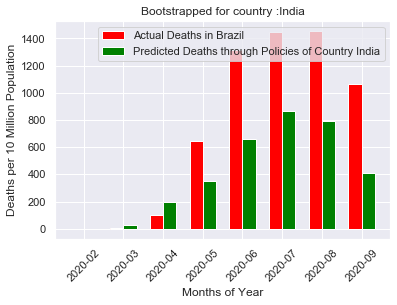

In [572]:
cnt = 'India'
Actual_D = Actual[cnt]
Pred_D = get_avg_pred(Boots[cnt])
Months = pd.date_range(X_test.index[0],X_test.index[-1],freq='MS').strftime("%Y-%m").tolist()
Months.insert(0,(X_test.index[0].strftime("%Y-%m")))
#print(Months)
indices = range(len(Actual_D))
width = np.min(np.diff(indices))/3

plt.bar(indices - width/2., Actual_D, width, color = 'red', label = 'Actual Deaths in Brazil')
plt.bar(indices + width/2., Pred_D, width, color = 'green', label = f'Predicted Deaths through Policies of Country {cnt}')
plt.xlabel('Months of Year')
plt.ylabel('Deaths per 10 Million Population')

plt.xticks(indices, Months, rotation = 45)
plt.title(f'Bootstrapped for country :{cnt}')
plt.legend()

Text(0.5, 1.0, 'Bootstrapped Monthwise Lives Predicted from India')

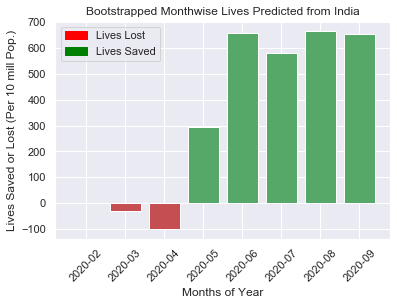

In [573]:
sub = zip(Actual_D, Pred_D)
Lives_Saved = [i - j for i, j in sub]
#lmap = filter(lambda x: x>0, Lives_Saved)
lmap = map(lambda x: x>0, Lives_Saved)
lmap = list(lmap)
lmap = map(lambda x: 'g' if x>0 else 'r', lmap)
lmap = list(lmap)
#print(lmap)
plt.bar(Months, Lives_Saved,color = lmap)
plt.xlabel('Months of Year')
plt.ylabel('Lives Saved or Lost (Per 10 mill Pop.)')
plt.xticks(rotation = 45)

colors = {'Lives Lost':'red', 'Lives Saved':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title(f'Bootstrapped Monthwise Lives Predicted from {cnt}')

#### Performance when Modelled on Italy (Bootstrapped Case)

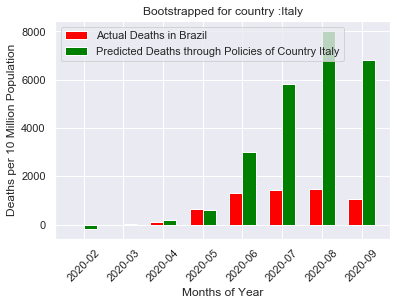

In [574]:
cnt = 'Italy'
Actual_D = Actual[cnt]
Pred_D = get_avg_pred(Boots[cnt])
Months = pd.date_range(X_test.index[0],X_test.index[-1],freq='MS').strftime("%Y-%m").tolist()
Months.insert(0,(X_test.index[0].strftime("%Y-%m")))
#print(Months)
indices = range(len(Actual_D))
width = np.min(np.diff(indices))/3

plt.bar(indices - width/2., Actual_D, width, color = 'red', label = 'Actual Deaths in Brazil')
plt.bar(indices + width/2., Pred_D, width, color = 'green', label = f'Predicted Deaths through Policies of Country {cnt}')
plt.xlabel('Months of Year')
plt.ylabel('Deaths per 10 Million Population')

plt.xticks(indices, Months, rotation = 45)
plt.title(f'Bootstrapped for country :{cnt}')
plt.legend()

Text(0.5, 1.0, 'Bootstrapped Monthwise Lives Predicted from Italy')

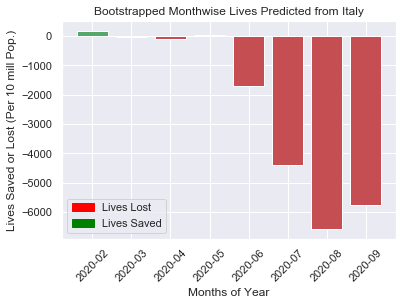

In [575]:
sub = zip(Actual_D, Pred_D)
Lives_Saved = [i - j for i, j in sub]
#lmap = filter(lambda x: x>0, Lives_Saved)
lmap = map(lambda x: x>0, Lives_Saved)
lmap = list(lmap)
lmap = map(lambda x: 'g' if x>0 else 'r', lmap)
lmap = list(lmap)
#print(lmap)
plt.bar(Months, Lives_Saved,color = lmap)
plt.xlabel('Months of Year')
plt.ylabel('Lives Saved or Lost (Per 10 mill Pop.)')
plt.xticks(rotation = 45)

colors = {'Lives Lost':'red', 'Lives Saved':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title(f'Bootstrapped Monthwise Lives Predicted from {cnt}')

#### Performance when Modelled on Korea (Bootstrapped Case)

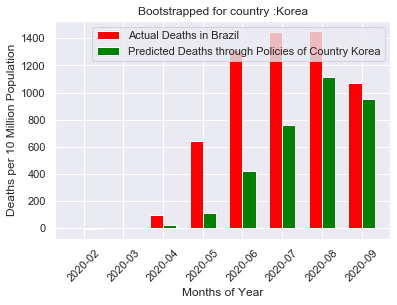

In [576]:
cnt = 'Korea'
Actual_D = Actual[cnt]
Pred_D = get_avg_pred(Boots[cnt])
Months = pd.date_range(X_test.index[0],X_test.index[-1],freq='MS').strftime("%Y-%m").tolist()
Months.insert(0,(X_test.index[0].strftime("%Y-%m")))
#print(Months)
indices = range(len(Actual_D))
width = np.min(np.diff(indices))/3

plt.bar(indices - width/2., Actual_D, width, color = 'red', label = 'Actual Deaths in Brazil')
plt.bar(indices + width/2., Pred_D, width, color = 'green', label = f'Predicted Deaths through Policies of Country {cnt}')
plt.xlabel('Months of Year')
plt.ylabel('Deaths per 10 Million Population')

plt.xticks(indices, Months, rotation = 45)
plt.title(f'Bootstrapped for country :{cnt}')
plt.legend()

Text(0.5, 1.0, 'Bootstrapped Monthwise Lives Predicted from Korea')

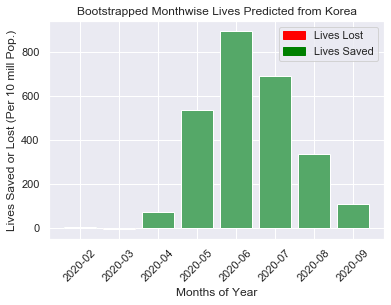

In [577]:
sub = zip(Actual_D, Pred_D)
Lives_Saved = [i - j for i, j in sub]
#lmap = filter(lambda x: x>0, Lives_Saved)
lmap = map(lambda x: x>0, Lives_Saved)
lmap = list(lmap)
lmap = map(lambda x: 'g' if x>0 else 'r', lmap)
lmap = list(lmap)
#print(lmap)
plt.bar(Months, Lives_Saved,color = lmap)
plt.xlabel('Months of Year')
plt.ylabel('Lives Saved or Lost (Per 10 mill Pop.)')
plt.xticks(rotation = 45)

colors = {'Lives Lost':'red', 'Lives Saved':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title(f'Bootstrapped Monthwise Lives Predicted from {cnt}')

### Visualizations Based on Our Performance Metric
Inferences (Non -Bootstrap):

1. For Brazil modelled on India: The predicted deaths  through India policies on Brazil, are considerably lesser than actual deaths in Brazil, for the later months. Therefore, hypothetically, a higher number of lives are saved in Brazil, thanks to the India policies.
2. For Brazil modelled on Italy: The predicted deaths in Brazil through Italy policies are consistently and significantly higher than the actual deaths in Brazil. Enforcing Italy policies on Brazil will most likely be futile since there are barely any lives saved over the year (when compared to the Brazil base case).
3.  For Brazil modelled on South Korea: The graphs look promising- the predicted deaths in Brazil through South Korea are consistently and significantly lower than the actual deaths in Brazil. More lives are saved, when compared to the India case in (1).  All in all, incorporating South Korea’s policy on Contact Tracing India will most likely have a positive impact year long.

Inferences (Bootstrap):

1. For Brazil modelled on Italy: Trends are same as the case before bootstrapping, except for the fact that the predicted deaths on Brazil through Italy policies are slightly higher on the whole.
2. For S.Korea modelled on Italy: Trends are same as the case before bootstrapping, except for the fact that the predicted deaths on Brazil through S.Korea policies are lower on the whole.

 

### **Conclusion** 
From the performance metric and graphs, as we would recommend **South Korea’s policy** of Contact Tracing, right from the start of Feb 2020 to September 2020. The  graphs show that a considerable number of lives in Brazil would be saved by adopting S.Korea’s policy, especially for the later months. We cannot infer much for the initial months, however we still recommend enforcing South Korea’s policy assuming that it would take a month or two , from prepping up to getting the policy into full action. 

However, we see **India's Policies** to also prove effective, and can also be considered as a **Secondary Option.**